According to our last time's discussion, this week I have been investigating scalable graph embedding methods. 
I have found a framework called Pytorch-Biggraph interesting to me. This is a embedding system that incorporates several modifications to traditional multi-relation embedding systems(i.e. embedding system for knowledge graph) to scale graphs with millions of nodes and billions of edges. This system only depends on CPU. 

Some of their experiment results are appealing. For example, they use Pytorch-Biggraph to train a Twitter subgraph containing a social network of 41,652,230 nodes and 1,468,365,182 edges with a single relation called "follow". They have tested different settings: 1. single machine; 2. distributed system. For the single machine setting, it costs 95.1GB main memory and 18 hours to finish 10 epochs of training.

These results are attractive to me. It has already reached a scale that totally satisfies our requirements. It totally depends on CPU. This is an interesting point. Previously, we worried that the GPU memory will be a bottleneck for DNN-based Graph embedding models. But this paper gives us a new aspect that if we do not use some fancy models (e.g. RNN), we may not need to use GPU. Here in Pytorch-Biggraph, I think they only use MLP (Multi-layer perceptron)(not directly mentioned in paper). Pytorch-Biggraph is designed for knowledge graph which contains entities and relations. To my understanding, knowledge graph is a specific type of graph. Since this method works for knowledge graph, it should work for more general graphs. But what the performance is for more general graphs is not reported.

I think this system has potential to be used in our project. One possible direction I'm thinking about is that if we can model a general graph as a knowledge graph, for example using its degrees and diamaters as the properties of each node, then we can train embeddings of each type of nodes as well as a network to compute the score between two embeddings. Then when we want to generate new graphs, we first sample properties for generated nodes, for example, sample a degree value from the distribution of degrees of training samples. Then we use this system to generate embeddings for the generated nodes. By computing the scores for two generated embeddings, if they are larger than a threshold, we generated an edge between them. By doing so, we expect to generate a large graph with similar scale as Pytorch-biggraph does. 

But this is a rough idea, I still have many unclear parts about the pytorch-biggraph. The original paper of the system is not clear, but fortunately, they have published a user document. I'm reading that document. 

I plan to carefully read that document and get more clear view about the feasibility of my previous thoughts

One of the novel method they use is to uses a block partitioning of the graph to overcome the memory limitations of graph embeddings. Nodes are randomly divided into P partitions that are sized so that two partitions can fit in memory. Every time training can be performed on one bucket at a time. The training of bucket (i,j) only requires the embeddeing for partions i and j to be stored in memory. All edges are divided into $P^2$ buckets. $P$ is the number of buckets.
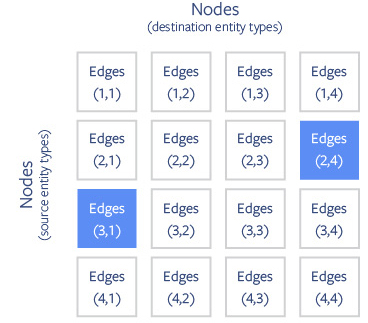